In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import sklearn.model_selection, sklearn.linear_model, sklearn.svm ,sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
gen = pd.read_csv("voice.csv")

In [5]:
gen

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [6]:
gen_data = pd.DataFrame(gen)

In [7]:
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
gen_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

<AxesSubplot:>

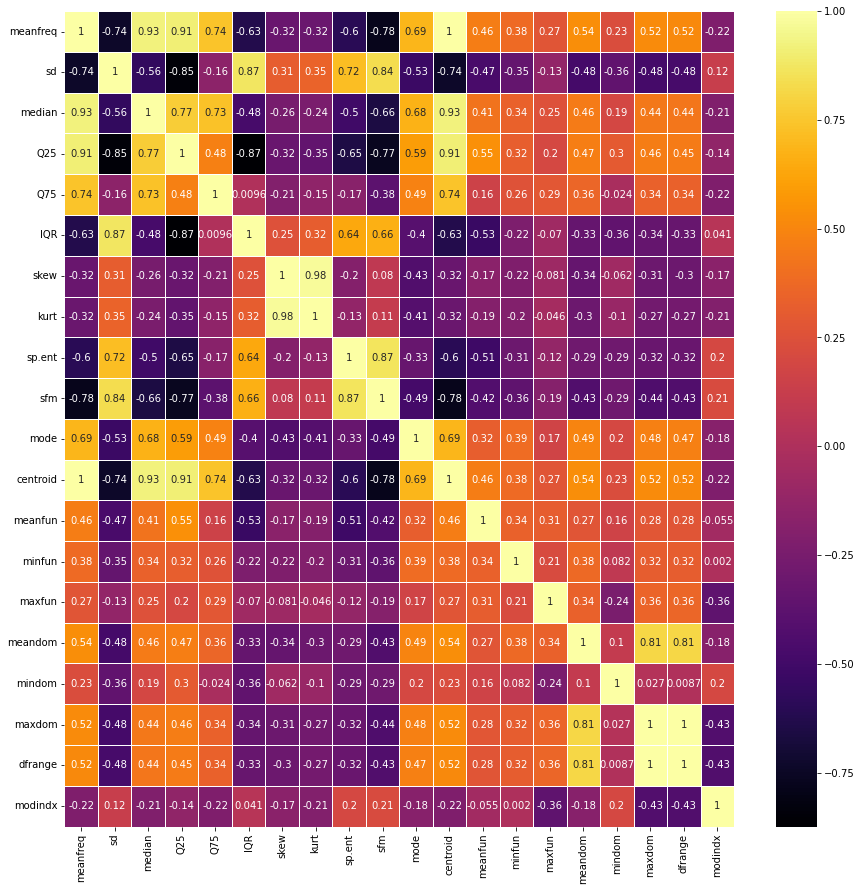

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='inferno',linewidths=0.5)

In [10]:
gen_data.replace(to_replace="male",value=1,inplace=True)
gen_data.replace(to_replace="female",value=0,inplace=True)

In [11]:
gen_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [12]:
xData = gen_data.iloc[:,:-1]
yData = gen_data["label"]
xData.shape,yData.shape

((3168, 20), (3168,))

In [13]:
TRAINSPLIT = 0.8
xTrain, xTest, yTrain, yTest  = train_test_split(xData,yData,train_size=TRAINSPLIT)
xTrain.shape,yTrain.shape

((2534, 20), (2534,))

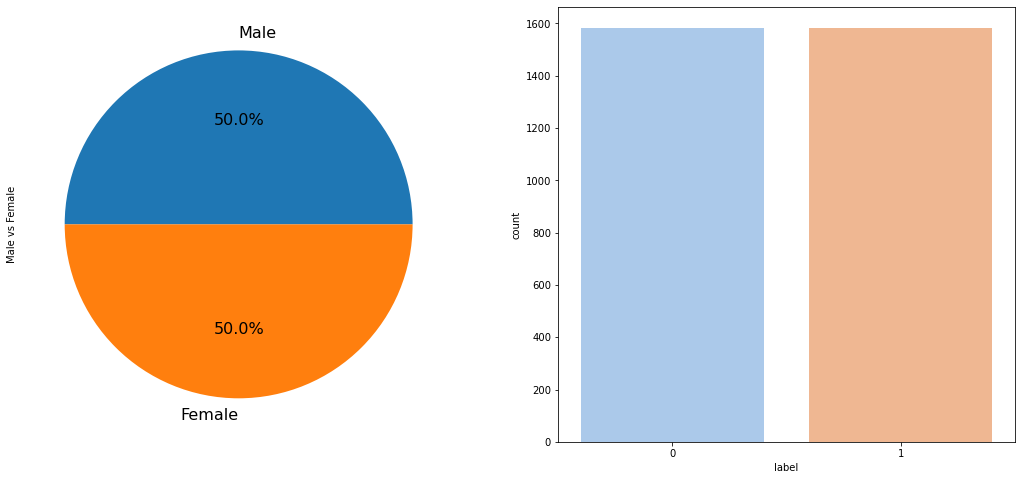

In [14]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
gen_data.label.value_counts().plot(kind="pie",
                           fontsize=16,
                           labels=["Male","Female"],
                           ylabel="Male vs Female",
                           autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x="label",data=gen_data,palette="pastel")
plt.show()


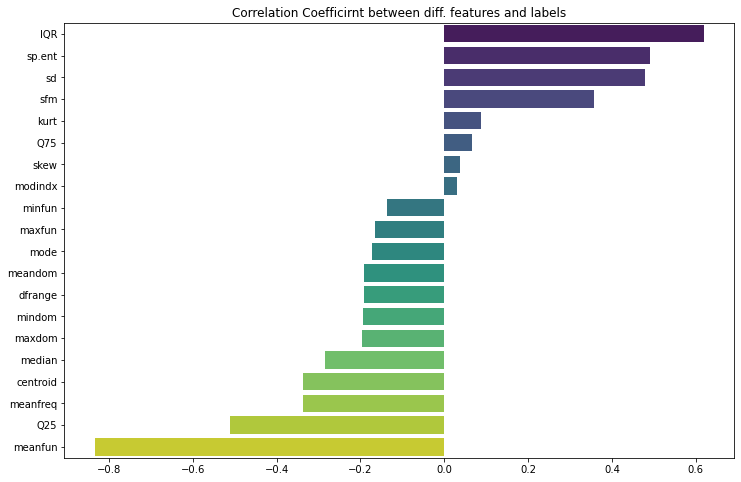

In [15]:
# Correlation Coefficient :
plt.figure(figsize=(12,8))
# Established the correlation in b\w label and Row under descend.
data = gen_data.corr()["label"].sort_values(ascending=False)

# Stored the index number of sorted data in a variable :"indices"
indices = data.index 

labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr,y=labels,palette='viridis')
plt.title('Correlation Coefficirnt between diff. features and labels')
plt.show()

In [16]:
corr_dt = gen_data.corr()["label"].sort_values(ascending=False)
corr_dt

label       1.000000
IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label, dtype: float64

In [17]:
# Logistic Regression :
regressionModel = LogisticRegression(solver='liblinear')
regressionModel.fit(xTrain,yTrain)
regressionModel.score(xTrain,yTrain)

0.909234411996843

In [18]:
regressionModel = LogisticRegression(solver='liblinear').fit(xTrain,yTrain)
print("Logistic Regression")
print("Accuracy on training set: {:.2f}".format(regressionModel.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(regressionModel.score(xTest,yTest)))

Logistic Regression
Accuracy on training set: 0.91
Accuracy on test set: 0.91


In [19]:
# RandomForest :
randomFModel = RandomForestClassifier()
randomFModel.fit(xTrain,yTrain)
randomFModel.score(xTrain,yTrain)

1.0

In [20]:
# RandomForest
forest = RandomForestClassifier(n_estimators=500,random_state=101).fit(xTrain,yTrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(xTest,yTest)))


Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.97


In [21]:
# Knn:
KNNModel = KNeighborsClassifier(n_neighbors=3)
KNNModel.fit(xTrain,yTrain)
KNNModel.score(xTrain,yTrain)

0.8484609313338595

In [22]:
KNNModel = KNeighborsClassifier(n_neighbors=3).fit(xTrain,yTrain)
print(" KNN :")
print("Accuracy on training set: {:.2f}".format(KNNModel.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(KNNModel.score(xTest,yTest)))

 KNN :
Accuracy on training set: 0.85
Accuracy on test set: 0.74


In [23]:
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(xTrain,yTrain)
KNNModel.score(xTrain,yTrain)

0.8062352012628256

In [24]:
KNNModel = KNeighborsClassifier(n_neighbors=7)
KNNModel.fit(xTrain,yTrain)
KNNModel.score(xTrain,yTrain)

0.7928176795580111

In [25]:
# SVM :Linear
svmLinearModel = sklearn.svm.SVC(kernel='linear',C=10)
svmLinearModel.fit(xTrain,yTrain)
svmLinearModel.score(xTrain,yTrain)

0.9727703235990529

In [26]:
svmLinearModel = sklearn.svm.SVC(kernel='linear',C=10).fit(xTrain,yTrain)
print("SVM :linear")
print("Accuracy on training set: {:.2f}".format(svmLinearModel.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(svmLinearModel.score(xTest,yTest)))

SVM :linear
Accuracy on training set: 0.97
Accuracy on test set: 0.97


In [27]:
# SVM: radial basis function ,10000
svmRBFModel = sklearn.svm.SVC(kernel='rbf',C=10000)
svmRBFModel.fit(xTrain,yTrain)
svmRBFModel.score(xTrain,yTrain)

0.9230465666929756

In [28]:
svmRBFModel = sklearn.svm.SVC(kernel='rbf',C=10000).fit(xTrain,yTrain)
print("SVM: radial basis function")
print("Accuracy on training set: {:.2f}".format(svmRBFModel.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(svmRBFModel.score(xTest,yTest)))

SVM: radial basis function
Accuracy on training set: 0.92
Accuracy on test set: 0.91


In [29]:
# SVM: polynomial ,10
svmLinearModel = sklearn.svm.SVC(kernel='poly',C=10)
svmLinearModel.fit(xTrain,yTrain)
svmLinearModel.score(xTrain,yTrain)

0.5228887134964483

In [30]:
svmpolynomialodel = sklearn.svm.SVC(kernel='poly',C=100).fit(xTrain,yTrain)
print("SVM: polynomial")
print("Accuracy on training set: {:.2f}".format(svmpolynomialodel.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(svmpolynomialodel.score(xTest,yTest)))

SVM: polynomial
Accuracy on training set: 0.53
Accuracy on test set: 0.52


In [31]:
# DecisionTree
dTreeModel = DecisionTreeClassifier()
dTreeModel.fit(xTrain,yTrain)
dTreeModel.score(xTrain,yTrain)

1.0

In [32]:
dTreeModel = DecisionTreeClassifier().fit(xTrain,yTrain)
print("SVM: DecisionTree ")
print("Accuracy on training set: {:.2f}".format(dTreeModel.score(xTrain,yTrain)))
print("Accuracy on test set: {:.2f}".format(dTreeModel.score(xTest,yTest)))

SVM: DecisionTree 
Accuracy on training set: 1.00
Accuracy on test set: 0.96
